In [2]:
import sys
sys.path.append('../../../modules/')

%reload_ext autoreload
%autoreload 2
import datasets
import ML_classes

import matplotlib.pyplot as plt

2024-03-11 12:03:14.295411: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-11 12:03:14.295444: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-11 12:03:14.295450: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
MOM6_bucket = 'gs://leap-persistent/dhruvbalwada/MOM6/Phillips2Layer/'
L = 'all'

In [5]:
ML_data = datasets.MOM6_all_transformer('-', 'all', 
                                        input_channels=['U_x', 'U_y', 
                                                      'V_x', 'V_y', 
                                                      'Sx', 'Sy'])

In [8]:
ML_data.read_datatree(MOM6_bucket, 
                      keep_filt_scale=True, para_perp_out = True)

Dataset loaded from gs://leap-persistent/dhruvbalwada/MOM6/Phillips2Layer/res4km_sponge10day_long_ml_data_50km.zarr
Out para perp
Subsampling
Dataset loaded from gs://leap-persistent/dhruvbalwada/MOM6/Phillips2Layer/res4km_sponge10day_long_ml_data_100km.zarr
Out para perp
Subsampling
Dataset loaded from gs://leap-persistent/dhruvbalwada/MOM6/Phillips2Layer/res4km_sponge10day_long_ml_data_200km.zarr
Out para perp
Subsampling
Dataset loaded from gs://leap-persistent/dhruvbalwada/MOM6/Phillips2Layer/res4km_sponge10day_long_ml_data_400km.zarr
Out para perp
Subsampling


In [9]:
ML_data.generate_test_train_batches(normalize=False)

Test and train batches split. Number of batches: 37-5


In [10]:
ANN_model = ML_classes.ANN(num_in = len(ML_data.input_channels))

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


In [11]:
regress_sys = ML_classes.RegressionSystem(ANN_model, local_norm=True)

In [12]:
%%time
regress_sys.train_system(ML_data, 31, 1)

Train loss step 0:  14.321763515472412 test loss: 5.928382778167725
Train loss step 1:  6.0334397264429045 test loss: 5.154229164123535
Train loss step 2:  5.572099195944296 test loss: 4.878552055358886
Train loss step 3:  5.343711904577307 test loss: 4.718914794921875
Train loss step 4:  5.206919811867379 test loss: 4.61627950668335
Train loss step 5:  5.114520253361882 test loss: 4.541454410552978
Train loss step 6:  5.04688293869431 test loss: 4.492848300933838
Train loss step 7:  5.002726271345809 test loss: 4.4597063064575195
Train loss step 8:  4.971119030101879 test loss: 4.437681770324707
Train loss step 9:  4.946474732579412 test loss: 4.418686866760254
Train loss step 10:  4.928145073555611 test loss: 4.400455093383789
Train loss step 11:  4.9127448571694865 test loss: 4.386722087860107
Train loss step 12:  4.9007256868723275 test loss: 4.3807275772094725
Train loss step 13:  4.890769056371741 test loss: 4.377971172332764
Train loss step 14:  4.88152518143525 test loss: 4.367

In [13]:
# Save the checkpoint
CKPT_DIR = '/home/jovyan/mesoscale_buoyancy_param_ML/ML_checkpoints/ckpts_all_MOM6_P2L_window_1_local_norm_true_out_para_perp'
regress_sys.save_checkpoint(CKPT_DIR)

# Save model nc file
model_nc = '/home/jovyan/mesoscale_buoyancy_param_ML/ML_model_ncs/' +'MOM6_P2L_all_window_1_local_norm_true_out_para_perp'+'.nc'
regress_sys.save_weights_nc(model_nc)

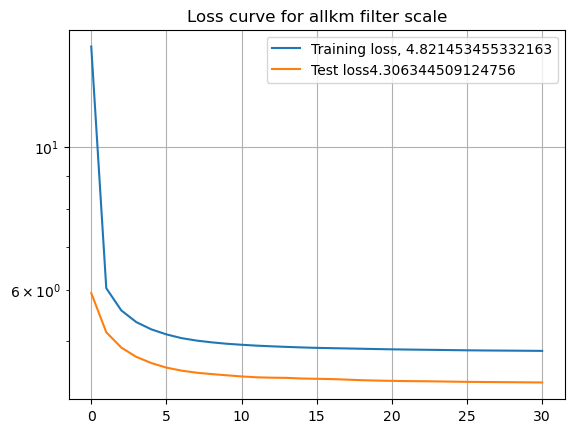

In [17]:
## Loss plot
plt.plot(regress_sys.train_loss, label='Training loss, '+str(regress_sys.train_loss[-1]))
plt.plot(regress_sys.test_loss, label='Test loss'+str(regress_sys.test_loss[-1]))

plt.title('Loss curve for '+ L+ 'km filter scale')
plt.grid()
plt.yscale('log')
plt.legend()

#plt.savefig('figures/MOM6_'+L+'km_loss_curve_36_36.png')

In [14]:
ANN_model_large = ML_classes.ANN(shape=[36,36,2], num_in = len(ML_data.input_channels))

In [18]:
regress_sys_large = ML_classes.RegressionSystem(ANN_model_large, local_norm=True)

In [19]:
%%time
regress_sys_large.train_system(ML_data, 31, 1)

Train loss step 0:  10.386479725708833 test loss: 5.008446979522705
Train loss step 1:  5.3289203257174105 test loss: 4.631331157684326
Train loss step 2:  5.096102946513408 test loss: 4.517623043060302
Train loss step 3:  5.016205310821533 test loss: 4.464121723175049
Train loss step 4:  4.970989214407431 test loss: 4.429570484161377
Train loss step 5:  4.938185872258367 test loss: 4.405003261566162
Train loss step 6:  4.9112177281766325 test loss: 4.382707977294922
Train loss step 7:  4.888203221398431 test loss: 4.360996437072754
Train loss step 8:  4.868420781315984 test loss: 4.349296951293946
Train loss step 9:  4.853387020729683 test loss: 4.338255786895752
Train loss step 10:  4.840775631569527 test loss: 4.325668811798096
Train loss step 11:  4.8302396181467415 test loss: 4.320721626281738
Train loss step 12:  4.82325485590342 test loss: 4.315691947937012
Train loss step 13:  4.8169844472730485 test loss: 4.306829261779785
Train loss step 14:  4.810959687104097 test loss: 4.29

In [20]:
# Save the checkpoint
CKPT_DIR = '/home/jovyan/mesoscale_buoyancy_param_ML/ML_checkpoints/ckpts_all_MOM6_P2L_window_1_local_norm_true_out_para_perp_size_36_36'
regress_sys.save_checkpoint(CKPT_DIR)

# Save model nc file
model_nc = '/home/jovyan/mesoscale_buoyancy_param_ML/ML_model_ncs/' +'MOM6_P2L_all_window_1_local_norm_true_out_para_perp_size_36_36'+'.nc'
regress_sys.save_weights_nc(model_nc)